# Solving Bohachevsky function using scipy dual annealing

In [1]:
#!pip install scipy
import numpy as np
from scipy.optimize import dual_annealing

# Define objective function/s
def objective_function(solution):
    # Bohachevsky function
    return solution[0]**2 +2*(solution[1]**2) - 0.3*np.cos(3*np.pi*solution[0]) - 0.4*np.cos(4*np.pi*solution[1]) + 0.7

# Define boundary constraints of the decision variables
bounds = np.asarray([[-100, 100], [-100, 100]])

# Perform dual annealing search
res_dual = dual_annealing(objective_function, bounds=bounds, maxiter = 100)

# Print Dual Annealing Solution
print('Dual Annealing Solution: f(%s) = %.5f' % (res_dual['x'], res_dual['fun']))

Dual Annealing Solution: f([-6.18612076e-01 -2.38890515e-09]) = 0.41293


# Solving Bohachevsky function using MEALPY SA

In [2]:
#!pip install mealpy
from numpy import arange
import matplotlib.pyplot as plt
from pylab import meshgrid
from mealpy.physics_based.SA import OriginalSA
from mealpy.utils.space import IntegerVar

# Define integer bounds for each variable
bounds = [
    IntegerVar(lb=0, ub=1),  
    IntegerVar(lb=0, ub=1)  
]

# Define the optimization problem
problem = {
    "obj_func": objective_function,  # Replace with your function
    "bounds": bounds,
    "minmax": "min", 
    "obj_weights": [1, 1] 
}

# Define a SA solver
model = OriginalSA(epoch=100, pop_size=10, temp_init=100, step_size=0.1)

# Solve the problem using defined solver
result = model.solve(problem)
mealpy_solution=result.solution

# Print the result
print('MEALPY SA Solution:', mealpy_solution)

2025/01/28 08:25:29 PM, INFO, mealpy.physics_based.SA.OriginalSA: Solving single objective optimization problem.
2025/01/28 08:25:29 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 1, Current best: 0.0, Global best: 0.0, Runtime: 0.00030 seconds
2025/01/28 08:25:29 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 2, Current best: 0.0, Global best: 0.0, Runtime: 0.00028 seconds
2025/01/28 08:25:29 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 3, Current best: 0.0, Global best: 0.0, Runtime: 0.00015 seconds
2025/01/28 08:25:29 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 4, Current best: 0.0, Global best: 0.0, Runtime: 0.00027 seconds
2025/01/28 08:25:29 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 5, Current best: 0.0, Global best: 0.0, Runtime: 0.00037 seconds
2025/01/28 08:25:29 PM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 6, Current best: 0.0, Global best:

MEALPY SA Solution: [0. 0.]


# Plotting the objective functions and the obtained solutions

C:\Users\drala\AppData\Local\Temp\ipykernel_14148\2048966866.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = arange(bounds[0].lb, bounds[0].ub, 0.1)
C:\Users\drala\AppData\Local\Temp\ipykernel_14148\2048966866.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = arange(bounds[1].lb, bounds[1].ub, 0.1)


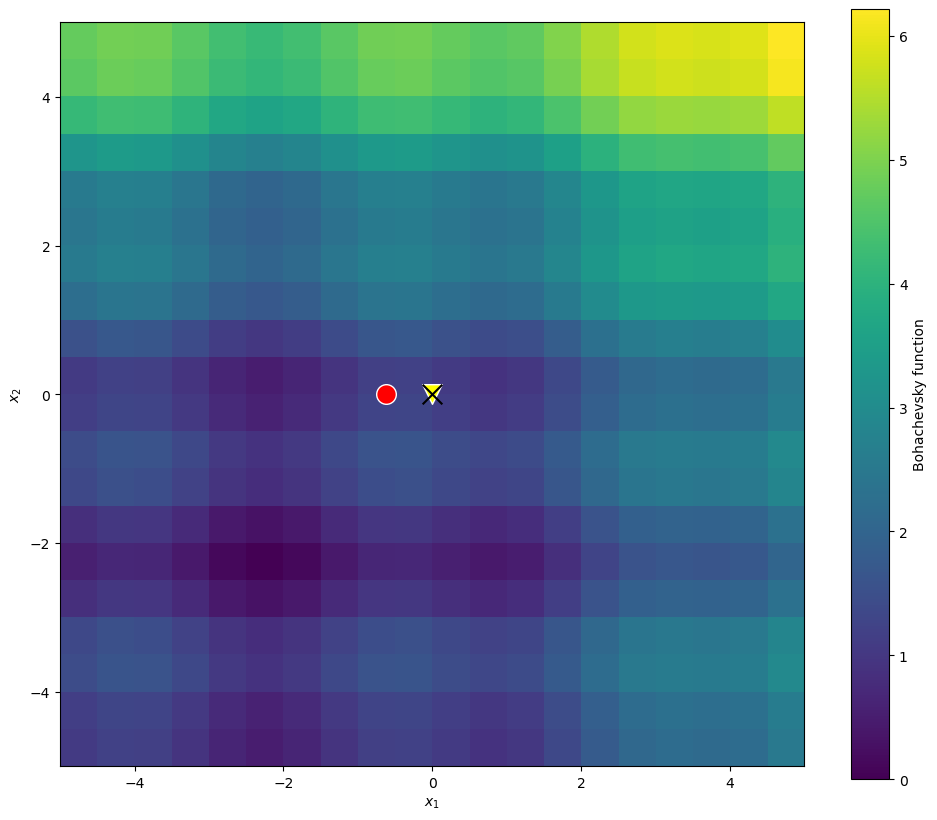

In [3]:
x = arange(bounds[0].lb, bounds[0].ub, 0.1)
y = arange(bounds[1].lb, bounds[1].ub, 0.1) 
X,Y = meshgrid(x, y)
F = objective_function([X,Y])

plt.figure(figsize=(12, 10))
plt.imshow(F, extent=[-5, 5,-5, 5], origin='lower', cmap='viridis')
plt.colorbar(label="Bohachevsky function")
plt.scatter(res_dual['x'][0],res_dual['x'][1], c='red',  s=200, marker='o', edgecolors='white')
plt.scatter(mealpy_solution[0],mealpy_solution[1], c='yellow',  s=200, marker='v', edgecolors='white')
plt.scatter(0,0, c='black', s=200, marker='x')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()